# A* Robotic Path Planning Algorithm
--- 
### Author: Michael Marinaccio, [Github Profile](https://github.com/mnmarinaccio) <br />
### Date: February, 2025 <br />
---

### This Jupyter Notebook demonstrates the A* path planning algorithm for robotics. It defines a grid with obstacles, a start, and a goal position. The notebook visualizes the grid, then uses the A* algorithm to find the shortest path from the start to the goal while avoiding obstacles. The final path is displayed on the grid using matplotlib, with the path, start, and goal clearly marked. <br />
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Grid Visualization Function

In [2]:

def visualize_grid(grid):
    fig, ax = plt.subplots(figsize=(8, 6))  
    
    for row in range(grid.shape[0]):
        for col in range(grid.shape[1]):
            if (row, col) == start:
                color = "green"  # Start position
            elif (row, col) == goal:
                color = "red"  # Goal position
            elif grid[row, col] == 1:
                color = "black"  # Obstacle
            else:
                color = "white"  # Free space
    
            ax.add_patch(plt.Rectangle((col, grid.shape[0] - row - 1), 1, 1, color=color))
    
    # Set grid limits and aspect
    ax.set_xlim(0, grid.shape[1])
    ax.set_ylim(0, grid.shape[0])
    ax.set_aspect('equal') 
    ax.set_xticks(range(grid.shape[1]))
    ax.set_yticks(range(grid.shape[0]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, color="gray", linewidth=0.5)
    ax.set_title("Grid Visualization")
    
    plt.show()


#### Define Grid, Start / Goal Positions, and Visualize

START : (8, 4); GOAL : (1, 3)


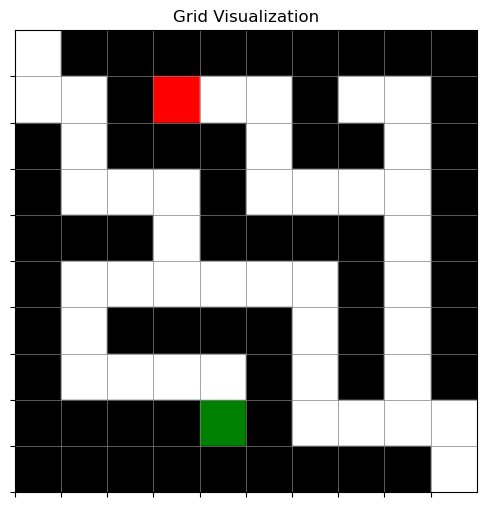

In [3]:
# grid = np.array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
#                  [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
#                  [0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
#                  [0, 1, 0, 0, 1, 1, 1, 0, 1, 1],
#                  [0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
#                  [1, 1, 1, 0, 0, 0, 0, 0, 0, 1],
#                 ])

grid = np.array([
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
])


start = (8, 4)
goal = (1, 3)
print(f'START : {start}; GOAL : {goal}')
visualize_grid(grid)

#### Define Movement Rules (Up, Down, Left, Right)

In [4]:
# define 4-way movement rules 
MOVES_4_WAY = [(-1, 0), # Up
               (1, 0),      # Down
               (0, -1),      # Left 
               (0, 1)       # Right
              ]

#### Path Reconstruction

In [5]:
def findStart(came_from, start, goal):
    path = []
    currPos = goal
    while currPos != start:
        path.append(currPos)
        currPos = came_from[currPos]
    path.append(start)
    path.reverse()
    return path

#### A* Algorithm Implementation

In [6]:
import heapq

g_start = 0
h_start = abs(goal[1]-start[1]) + abs(goal[0] - start[0])
f_start = g_start + h_start
# priority queue (min heap)
# format (priority f_n, current position, g_n, parent)
pq = []
heapq.heappush(pq, (f_start, start, g_start, None))

# track visited nodes
visited = set()

#reconstruction dict
came_from = {}

# track g_n values 
g_values = {start: 0}

final_path = None

# while pq is not empty
while pq:
    #print(pq)
    # remove node from queue
    f_n, currPos, g_n, parent = heapq.heappop(pq)
    
    # goal found
    if currPos == goal:
        print(f'REACHED GOAL {currPos} and the PARENT is {came_from[currPos]}')
        finalPath = findStart(came_from, start, goal)
        break

    # skip if we have already been to this position
    if currPos in visited:
        continue
    visited.add(currPos)

    for move in MOVES_4_WAY:
        newPos = (currPos[0]+move[0], currPos[1]+move[1])

        # out of bounds or hit an obstacle
        if (newPos[0] < 0 or 
            newPos[1] < 0 or 
            newPos[0] >= grid.shape[0] or 
            newPos[1] >= grid.shape[1] or 
            grid[newPos[0]][newPos[1]] == 1):
            continue
            
        # found valid position, compute g_n, h_n, f_n, and newPos
        new_g_n = g_n + 1
        h_n = abs(goal[1]-newPos[1]) + abs(goal[0] - newPos[0])
        f_n = new_g_n + h_n

        # if there is a better path to newPos, update the path
        if newPos not in g_values or new_g_n < g_values[newPos]:
            g_values[newPos] = new_g_n
            heapq.heappush(pq, (f_n, newPos, new_g_n, currPos))
            came_from[newPos] = currPos # store path parent


print(f'FINAL PATH IS {finalPath}')

REACHED GOAL (1, 3) and the PARENT is (1, 4)
FINAL PATH IS [(8, 4), (7, 4), (7, 3), (7, 2), (7, 1), (6, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 6), (7, 6), (8, 6), (8, 7), (8, 8), (7, 8), (6, 8), (5, 8), (4, 8), (3, 8), (3, 7), (3, 6), (3, 5), (2, 5), (1, 5), (1, 4), (1, 3)]


#### A* Algorithm Final Path Visualization

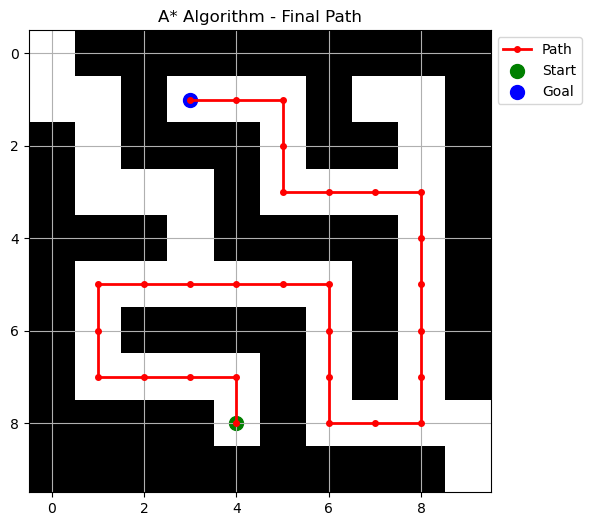

In [7]:
plt.figure(figsize=(8, 6)) 
plt.imshow(grid, cmap="gray_r", origin="upper")  
path_y, path_x = zip(*finalPath)
plt.plot(path_x, path_y, color="red", linewidth=2, marker='o', markersize=4, label="Path")
plt.scatter(start[1], start[0], color="green", s=100, label="Start")
plt.scatter(goal[1], goal[0], color="blue", s=100, label="Goal")
plt.title("A* Algorithm - Final Path")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.gca().set_aspect('equal') 
plt.show()

